#Background

Vanguard S&P 500 Index ETF seeks to track, to the extent reasonably possible and before fees and expenses, the performance of a broad U.S. equity index that measures the investment return of large-capitalization U.S. stocks. Currently, this Vanguard ETF seeks to track the S&P 500 Index (or any successor thereto). It invests directly or indirectly primarily in stocks of U.S. companies.

**Inception** date: 02 Nov 2012
**Assets Under Management: 9.81


##Project overview

In this project, we will use historical data from yahoo finance for VFV.TO and other stocks to predict the future price of the ETF.

##Strategies


Random Forest Classifer

##Data Cleaning

In [ ]:
import yfinance as  yf #yahoo finance data
from sklearn.model_selection import train_test_split

In [ ]:
SP500 = yf.Ticker("VFV.TO") #symbols from yahoo finance should be exaxt (^GSPC, VFV.TO, SHOP.TO)

In [ ]:
APL = yf.Ticker("AAPL")
APL = APL.history(period="max")

In [ ]:
MSFT = yf.Ticker("MSFT")
MSFT = MSFT.history(period="max")

In [ ]:
SP500 = SP500.history(period="max") #importing historical data with max period (period can be 1day, 5days, 6 months, 1 year, 5 years and all time (max))
SP500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2012-11-08 00:00:00-05:00,20.953408,20.953408,20.919518,20.919518,4400,0.0,0.0,0.0
2012-11-09 00:00:00-05:00,20.758535,20.919520,20.750062,20.843264,2900,0.0,0.0,0.0
2012-11-12 00:00:00-05:00,20.843267,20.843267,20.817848,20.817848,1200,0.0,0.0,0.0
2012-11-13 00:00:00-05:00,20.758540,20.894105,20.758540,20.826323,4600,0.0,0.0,0.0
2012-11-14 00:00:00-05:00,20.699228,20.699228,20.682281,20.682281,2600,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-12-07 00:00:00-05:00,110.519997,110.940002,110.459999,110.839996,53600,0.0,0.0,0.0
2023-12-08 00:00:00-05:00,110.760002,111.330002,110.660004,111.250000,139600,0.0,0.0,0.0
2023-12-11 00:00:00-05:00,111.050003,111.599998,110.790001,111.599998,125000,0.0,0.0,0.0


In [ ]:
SP500.index #time index in the far right column

DatetimeIndex(['2012-11-08 00:00:00-05:00', '2012-11-09 00:00:00-05:00',
               '2012-11-12 00:00:00-05:00', '2012-11-13 00:00:00-05:00',
               '2012-11-14 00:00:00-05:00', '2012-11-15 00:00:00-05:00',
               '2012-11-16 00:00:00-05:00', '2012-11-19 00:00:00-05:00',
               '2012-11-20 00:00:00-05:00', '2012-11-21 00:00:00-05:00',
               ...
               '2023-11-30 00:00:00-05:00', '2023-12-01 00:00:00-05:00',
               '2023-12-04 00:00:00-05:00', '2023-12-05 00:00:00-05:00',
               '2023-12-06 00:00:00-05:00', '2023-12-07 00:00:00-05:00',
               '2023-12-08 00:00:00-05:00', '2023-12-11 00:00:00-05:00',
               '2023-12-12 00:00:00-05:00', '2023-12-13 00:00:00-05:00'],
              dtype='datetime64[ns, America/Toronto]', name='Date', length=2785, freq=None)

<Axes: xlabel='Date'>

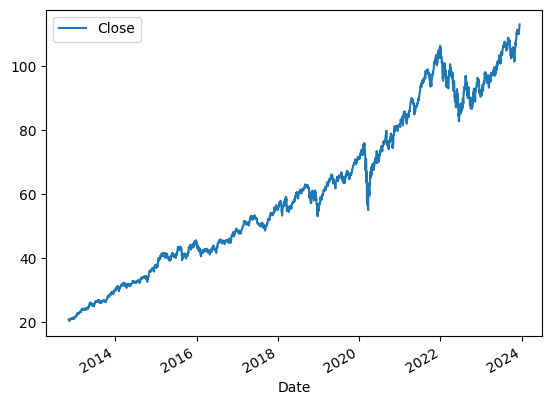

In [ ]:
SP500.plot.line(y="Close", use_index=True) #y axis is the close price of SnP

In [ ]:
del SP500["Dividends"] #data cleaning to remove the dividends columns
del SP500["Stock Splits"] #data cleaning to remove the stock splits columns

In [ ]:
##predicting the direction of the stock (when it goes up at x time)
#target will be if the stock will go up, can we predict that it will go up
SP500["Tomorrow"] = SP500["Close"].shift(-1) #this takes the value of closed price on 11/09 and assigns it to the value of tomorrow's price on 11/08

In [ ]:
SP500

,Open,High,Low,Close,Volume,Capital Gains,Tomorrow
Date,,,,,,,
2012-11-08 00:00:00-05:00,20.953408,20.953408,20.919518,20.919518,4400,0.0,20.843264
2012-11-09 00:00:00-05:00,20.758535,20.919520,20.750062,20.843264,2900,0.0,20.817848
2012-11-12 00:00:00-05:00,20.843267,20.843267,20.817848,20.817848,1200,0.0,20.826323
2012-11-13 00:00:00-05:00,20.758540,20.894105,20.758540,20.826323,4600,0.0,20.682281
2012-11-14 00:00:00-05:00,20.699228,20.699228,20.682281,20.682281,2600,0.0,20.394201
...,...,...,...,...,...,...,...
2023-12-07 00:00:00-05:00,110.519997,110.940002,110.459999,110.839996,53600,0.0,111.250000
2023-12-08 00:00:00-05:00,110.760002,111.330002,110.660004,111.250000,139600,0.0,111.599998
2023-12-11 00:00:00-05:00,111.050003,111.599998,110.790001,111.599998,125000,0.0,112.260002


In [ ]:
SP500["Target"] = (SP500["Tomorrow"] > SP500["Close"]). astype(int) #this converts the statement in boolean

In [ ]:
SP500

,Open,High,Low,Close,Volume,Capital Gains,Tomorrow,Target
Date,,,,,,,,
2012-11-08 00:00:00-05:00,20.953408,20.953408,20.919518,20.919518,4400,0.0,20.843264,0
2012-11-09 00:00:00-05:00,20.758535,20.919520,20.750062,20.843264,2900,0.0,20.817848,0
2012-11-12 00:00:00-05:00,20.843267,20.843267,20.817848,20.817848,1200,0.0,20.826323,1
2012-11-13 00:00:00-05:00,20.758540,20.894105,20.758540,20.826323,4600,0.0,20.682281,0
2012-11-14 00:00:00-05:00,20.699228,20.699228,20.682281,20.682281,2600,0.0,20.394201,0
...,...,...,...,...,...,...,...,...
2023-12-07 00:00:00-05:00,110.519997,110.940002,110.459999,110.839996,53600,0.0,111.250000,1
2023-12-08 00:00:00-05:00,110.760002,111.330002,110.660004,111.250000,139600,0.0,111.599998,1
2023-12-11 00:00:00-05:00,111.050003,111.599998,110.790001,111.599998,125000,0.0,112.260002,1


In [ ]:
SP500 = SP500.loc["1990-01-01":].copy() #dates after 1990-01-01 and .copy to avoid pandas setting with copy warning
SP500

,Open,High,Low,Close,Volume,Capital Gains,Tomorrow
Date,,,,,,,
2012-11-08 00:00:00-05:00,20.953408,20.953408,20.919518,20.919518,4400,0.0,20.843264
2012-11-09 00:00:00-05:00,20.758535,20.919520,20.750062,20.843264,2900,0.0,20.817848
2012-11-12 00:00:00-05:00,20.843267,20.843267,20.817848,20.817848,1200,0.0,20.826323
2012-11-13 00:00:00-05:00,20.758540,20.894105,20.758540,20.826323,4600,0.0,20.682281
2012-11-14 00:00:00-05:00,20.699228,20.699228,20.682281,20.682281,2600,0.0,20.394201
...,...,...,...,...,...,...,...
2023-12-07 00:00:00-05:00,110.519997,110.940002,110.459999,110.839996,53600,0.0,111.250000
2023-12-08 00:00:00-05:00,110.760002,111.330002,110.660004,111.250000,139600,0.0,111.599998
2023-12-11 00:00:00-05:00,111.050003,111.599998,110.790001,111.599998,125000,0.0,112.260002


##Machine Learning Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

##videos on random forest
## randomForest works by training individual decision trees with randomized parameters and is resistant to overfitting.
##can pick up non linear relationship
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1) #precision increases with increasing n_estimators
#min_samples_split protects decision tree from overfitting

#time series data
train = SP500.iloc[:-100] #split the data in train set, all rows except 100 rows into the training set
test = SP500.iloc[-100:] #the last 100 rows in the test set

predictors = ["Close", "Volume", "Open", "High", "Low"] #dont use already known values such as Tomorrow or target column.
model.fit(train[predictors], train["Target"]) #use the predictors to train the model in order to predict the target

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score #to measure if we were right i.e when we said that the market would go up, did it actually go up?

import pandas as pd

preds = model.predict(test[predictors]) #predictors are in a numpy array
preds = pd.Series(preds, index=test.index) #turning numpy array into pandas series
precision_score(test["Target"], preds) #calculating the precision score using the target and the predictions from pd.series


0.6415094339622641

<Axes: xlabel='Date'>

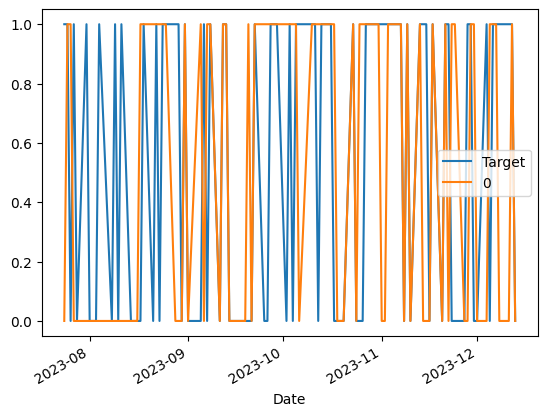

In [ ]:
combined = pd.concat([test["Target"], preds], axis=1) #axis =1 means treat each of the input as a column
combined.plot()


##Back testing

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=2500, step=250): #2500 = take 10 years of data to train the model, step =250 -> move to the next year (11,12...)
    all_predictions = [] #creating a list

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy() #training = all the years prior to the current year
        test = data.iloc[i:(i+step)].copy() #current year
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(SP500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts() #how many times we predicted that the market would go up (1)

1    144
0    138
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5555555555555556

In [ ]:
#we have to find a benchmark to see if the precision score is good enough
predictions["Target"].value_counts() / predictions.shape[0] #market actually went up 54.26% of the time when we said it was going to go up.

1    0.542553
0    0.457447
Name: Target, dtype: float64

In [ ]:
horizons = [2,5,60,250,1000] #the last 2 days, the last trading week =5 days, 3 months, 1 year and 4years
new_predictors = []

for horizon in horizons:
    rolling_averages = SP500.rolling(horizon).mean() #random

    ratio_column = f"Close_Ratio_{horizon}"
    SP500[ratio_column] = SP500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    SP500[trend_column] = SP500.shift(1).rolling(horizon).sum()["Target"] #SHIFT forward

    new_predictors+= [ratio_column, trend_column]

## Improvements

#Extension to this model
1. exchanges that are open overnight

2. news including macroeconomic factors, interest rate, inflation
3. add key stocks or key sectors, tech,
4. increasing resolution min by min data instead of day to day

In [ ]:
first_time = pd.to_datetime("2012-11-08 00:00:00-05:00")

In [ ]:
APL = yf.Ticker("AAPL")
APL = APL.history(period="max")
APL = APL.loc[first_time:]

In [ ]:
PCAR = yf.Ticker("PCAR")
PCAR = PCAR.history(period="max")
PCAR = PCAR.loc[first_time:]

In [ ]:
MSFT = yf.Ticker("MSFT")
MSFT = MSFT.history(period="max")

In [ ]:
SP500["Tomorrow"] = SP500["Close"].shift(-1)
SP500["Target"] = (SP500["Tomorrow"] > SP500["Close"]). astype(int) #this converts the statement in boolean

In [ ]:
APL_predictors = APL[["Close", "Volume", "Open", "High", "Low"]].add_prefix('APL_')
PCAR_predictors = PCAR[["Close", "Volume", "Open", "High", "Low"]].add_prefix('PCAR_')
SP500_predictors = SP500[["Close", "Volume", "Open", "High", "Low", "Target"]].add_prefix('SP500_')

In [ ]:
X = SP500_predictors.merge(APL_predictors, how='inner', on='Date').merge(PCAR_predictors, how='inner', on='Date')

In [ ]:
X.columns

Index(['SP500_Close', 'SP500_Volume', 'SP500_Open', 'SP500_High', 'SP500_Low',
       'SP500_Target', 'APL_Close', 'APL_Volume', 'APL_Open', 'APL_High',
       'APL_Low', 'PCAR_Close', 'PCAR_Volume', 'PCAR_Open', 'PCAR_High',
       'PCAR_Low'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X.dropna(axis=0, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X.drop(columns=['SP500_Target'], axis=1),
    X['SP500_Target'],
    test_size=0.3)

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
precision_score(y_test, predictions)

0.5394736842105263

In [ ]:
import pandas as pd
import yfinance as yf

# Define the stock symbols
symbols = ['VFV.TO', 'MSFT']

# Download historical stock prices from Yahoo Finance
data = yf.download(symbols, start="2018-01-01", end="2023-01-01")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate correlation
correlation = returns['VFV.TO'].corr(returns['MSFT'])

# Print the correlation
print(f'Correlation between VFV.TO and MSFT: {correlation}')

[*********************100%%**********************]  2 of 2 completed
Correlation between VFV.TO and MSFT: 0.8027814837577097
